## Retrieve datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataset_enc = pd.read_csv('numercialDataset.csv')

## Preparing input sample for all columns

In [2]:
# Preparing input sample for all columns
inp = dataset_enc
inp = inp.drop('Insomnia', axis=1)
inp = inp.drop('OCD', axis=1)
inp = inp.drop('Depression', axis=1)
inp = inp.drop('Mental health score', axis=1)
inp = inp.drop('Anxiety', axis=1)

# Preparing input sample for genre columns
# inp = inp.drop('Age', axis=1)
# inp = inp.drop('Hours per day', axis=1)
# inp = inp.drop('BPM', axis=1)
# inp = inp.drop('Primary streaming service', axis=1)
# inp = inp.drop('Music effects', axis=1)

inp

,Age,Hours per day,BPM,Primary streaming service,Fav genre,Foreign languages,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],...,Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Music effects
0,18.0,4.0,132.0,4,15,1,0,0,3,0,...,3,0,2,2,1,0,1,1,3,1
1,61.0,2.5,84.0,5,6,1,2,0,0,1,...,2,3,2,0,2,2,0,0,0,0
2,18.0,4.0,107.0,4,12,0,0,0,1,0,...,3,2,2,0,2,3,3,0,1,0
3,18.0,5.0,86.0,4,6,1,1,2,0,0,...,3,1,3,1,3,3,3,3,0,0
4,18.0,3.0,66.0,5,15,1,2,0,1,2,...,0,1,1,1,1,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,17.0,2.0,120.0,4,14,1,3,1,0,2,...,0,2,1,1,3,0,1,3,0,0
590,18.0,1.0,160.0,4,11,1,1,1,0,0,...,0,0,1,0,3,0,0,2,2,0
591,19.0,6.0,120.0,2,13,0,1,2,2,1,...,1,1,2,1,2,2,2,1,1,0
592,19.0,5.0,170.0,4,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,2,0


## Train model and test

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define x
x = inp

#'y' is target variable
y = dataset_enc['Mental health score']

train_set, validate_set = train_test_split(dataset_enc)


# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=400, random_state=42, oob_score=True)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(x, y, test_size=0.5, random_state=42)


regressor.fit(X_train, y_train)

# # Make predictions
y_pred = regressor.predict(X_test)

## Visualise the outcome accuracy

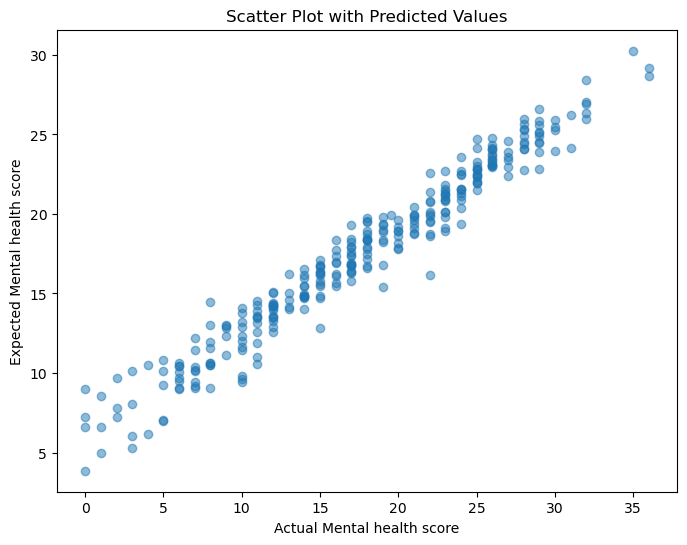

In [4]:

import numpy as np
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Mental health score')
plt.ylabel('Expected Mental health score')
plt.title('Scatter Plot with Predicted Values')
plt.show()

## Evaluate different accuracy measurements

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
# print("oob score: ", regressor.oob_score_)

Mean Absolute Error (MAE): 2.444368686868687
Mean Squared Error (MSE): 8.861864130892256
Root Mean Squared Error (RMSE): 2.9768883302690843
R-squared (R2): 0.8622376103348073


## Show model

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
 
# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]
 
# Plot the decision tree
# plt.figure(figsize=(50, 30))
# plot_tree(tree_to_plot, feature_names=dataset_enc.columns.tolist(), filled=True, rounded=True, fontsize=10)
# plt.title("Decision Tree from Random Forest")
# plt.show()

## Hyperparameters test

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

y_val = pd.DataFrame(y_val) 

tr_features = X_val
tr_labels = y_val

In [8]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in  zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200, 500],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}


grid_search = GridSearchCV(regressor, param_grid, cv=5)
grid_search.fit(tr_features, tr_labels.values.ravel())

print_results(grid_search)